In [4]:
// @file:Repository("*mavenLocal")
//@file:Repository("http://jcenter.bintray.com"
@file:Repository("*mavenLocal")
//@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.91")
@file:DependsOn("com.github.holgerbrandl:kalasim:0.7-SNAPSHOT")

@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")

In [5]:
import kravis.geomBar
import kravis.geomCol
import kravis.plot
import org.apache.commons.math3.distribution.LogNormalDistribution
import org.kalasim.Component
import org.kalasim.Environment
import org.kalasim.enumerated
import org.kalasim.invoke
import java.lang.Double.min
import kotlin.random.Random

In [6]:
class SquidGame(
    val numSteps: Int = 18,
    val numPlayers: Int = 16,
    val maxDuration: Int = 16 * 60
) : Environment(randomSeed = Random.nextInt()) {

    // randomization
    val stepTime = LogNormalDistribution(rg, 3.5, 0.88)
    val decision = enumerated(true, false)

    // state
    var playersLeft = numPlayers
    var stepsLeft = numSteps

    val numTrials: Int
        get() = numSteps - stepsLeft

    fun playerSurvived(playerNo: Int) = playersLeft < playerNo

    init {
        object : Component() {
            override fun process() = sequence {
                while(stepsLeft-- > 0) {
                    hold(min(stepTime(), 100.0)) // cap time at 100sec
                    if(decision()) playersLeft--
                    if(now > maxDuration) playersLeft=0
                    if(playersLeft == 0) passivate()
                }
            }
        }
    }
}

In [13]:
// run once
val sim = SquidGame()
sim.run()
println("${sim.playersLeft} survived")

7 survived


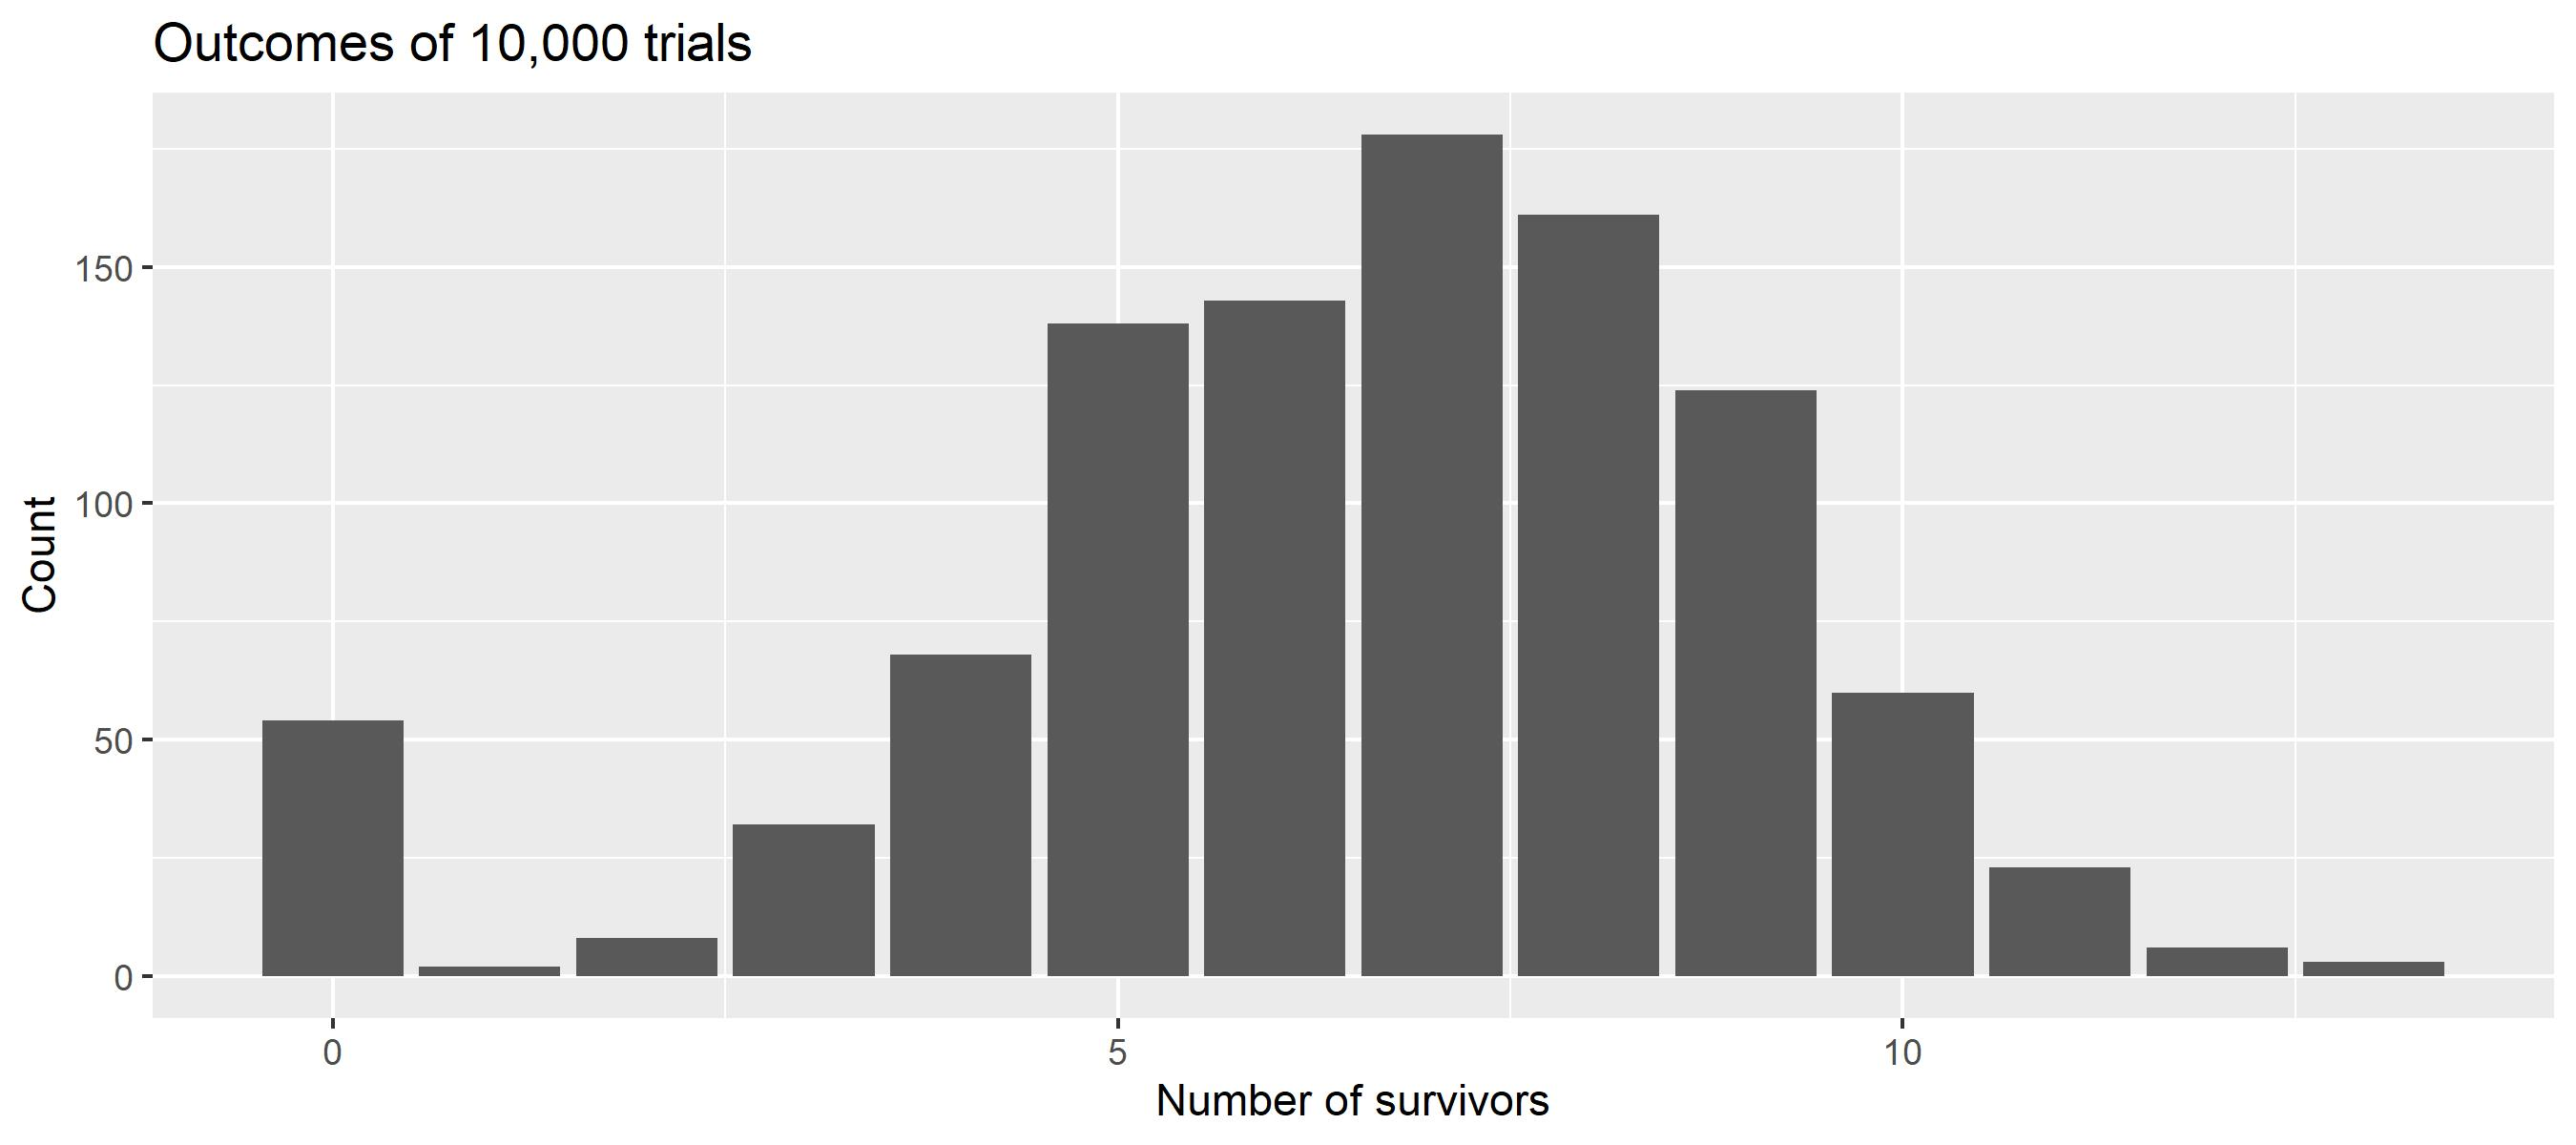

In [14]:
// run many times
val manyGames = org.kalasim.misc.repeat(1000) {
    SquidGame().apply { run() }
}

val avgSurvivors = manyGames.map { it.playersLeft }.average()

// or plot its distribution
manyGames.plot(x = { playersLeft }).geomBar().labs(
    title = "Outcomes of 10,000 trials",
    x = "Number of survivors",
    y = "Count"
).show()


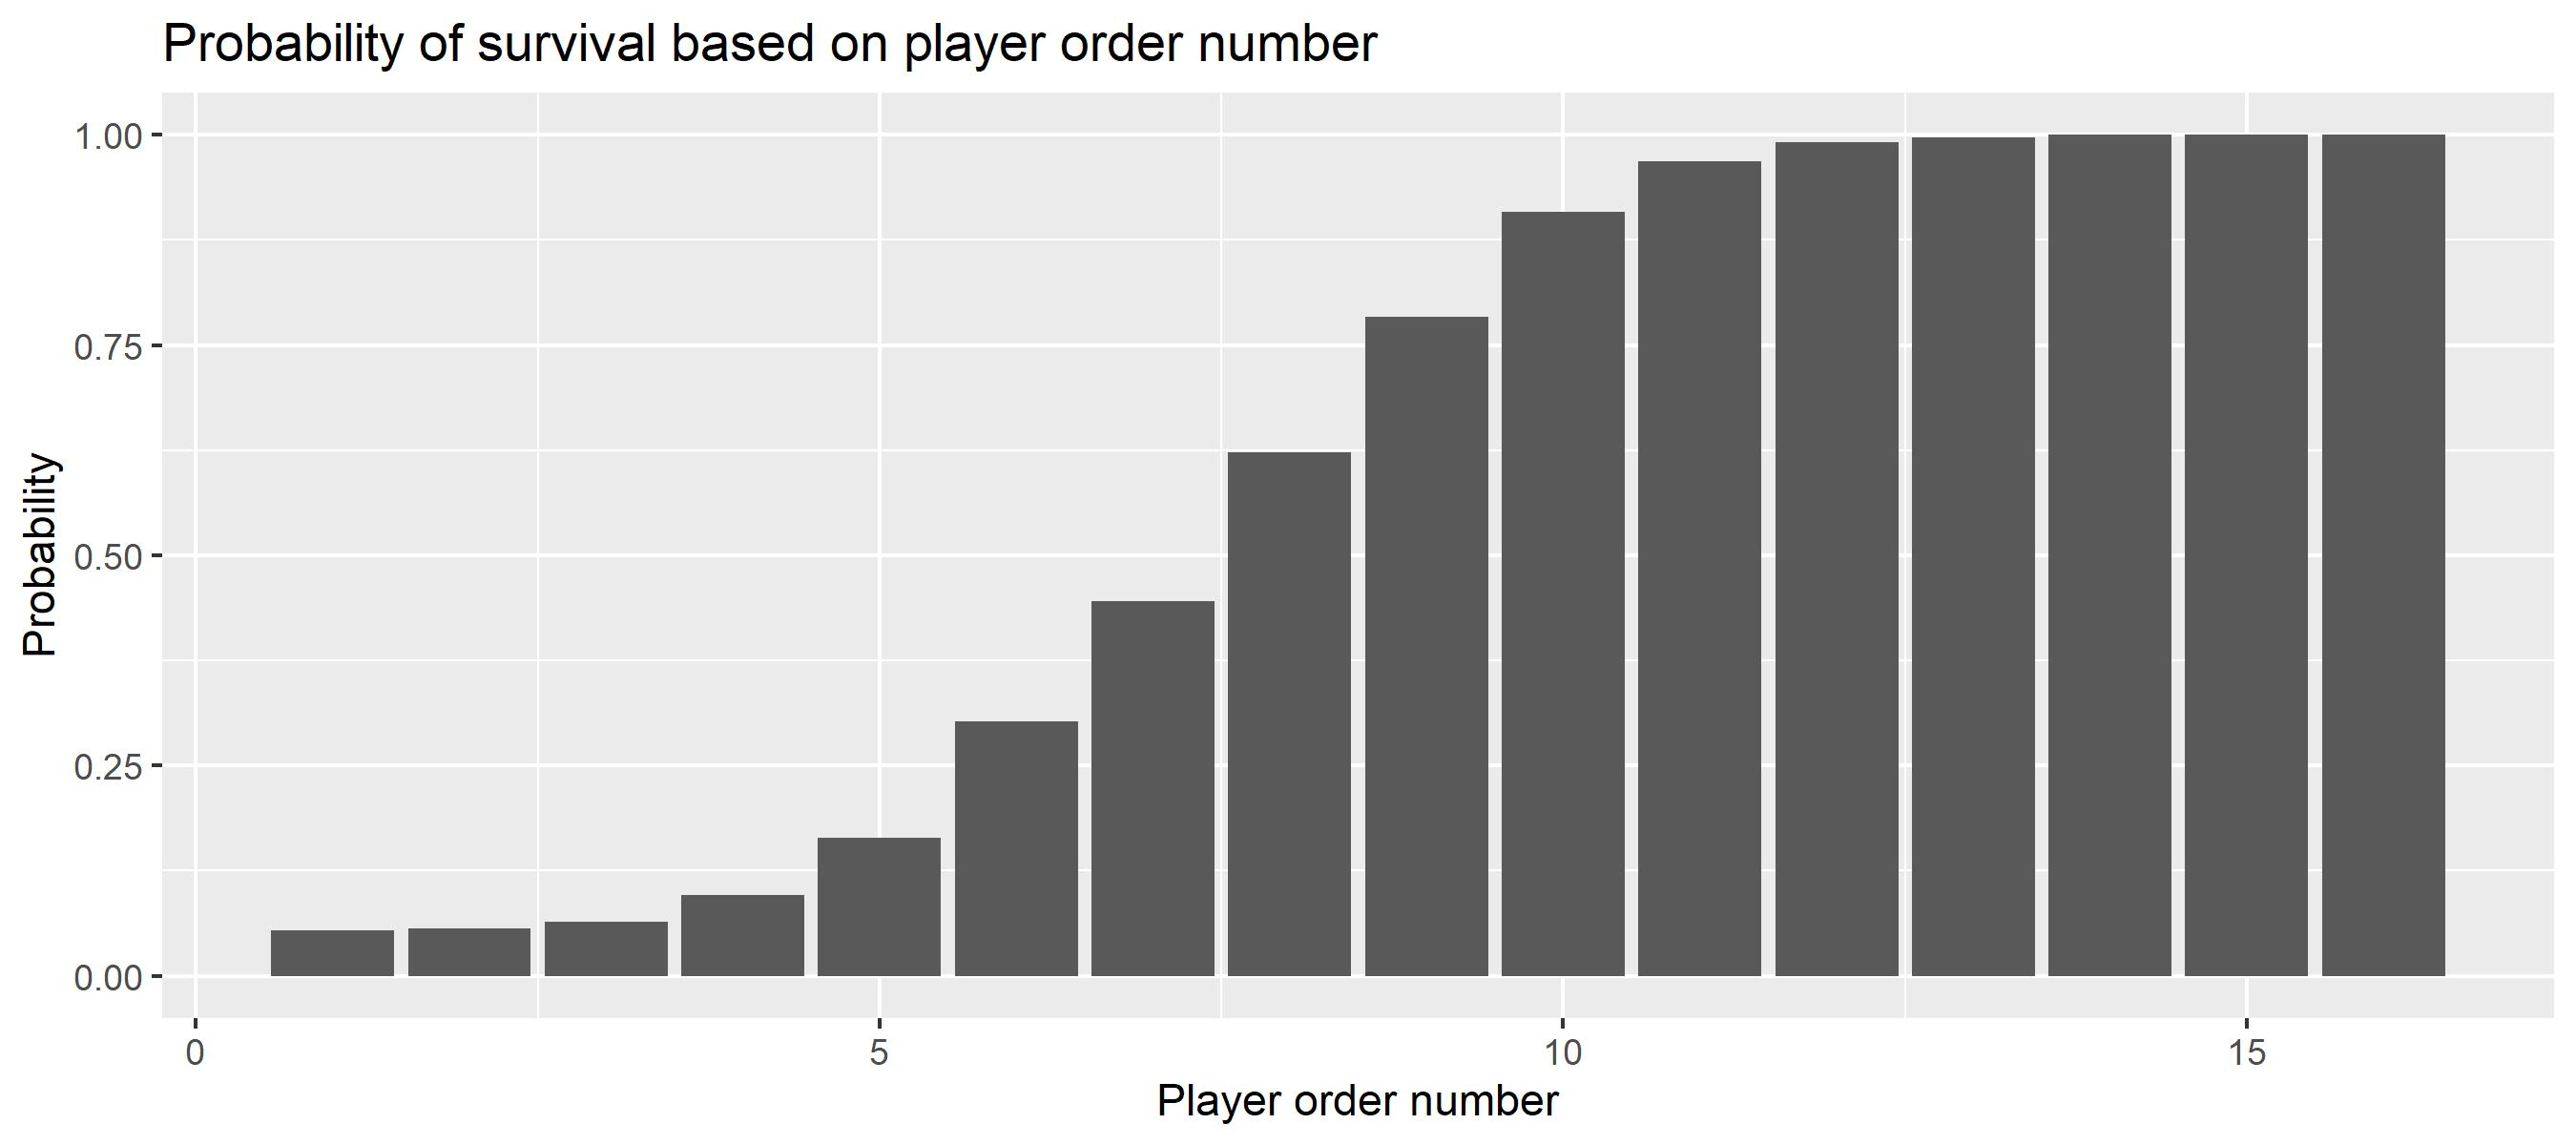

In [15]:

// Plot the probability of survival based on the player order number
val survivalProbByNo = (1..manyGames.first().numPlayers).map { playerNo ->
    playerNo to manyGames.count { it.playerSurvived(playerNo) }.toDouble() / manyGames.size
}
survivalProbByNo.plot(x = { it.first }, y = { it.second }).geomCol().labs(
    title = "Probability of survival based on player order number",
    x = "Player order number",
    y = "Probability"
).show()

In [16]:
// Calculate the probability of having less than two survivors
val probLT2Players = manyGames.count { it.playersLeft < 2 }.toDouble() / manyGames.size
println("the probability for less than 2 players is ${probLT2Players}")

println("On average ${avgSurvivors} players will survive the game of squid")

// re-run our simulations, but with an increasing number of steps. To keep things simple, I run 1,000 iterations of the game over an increasing number of steps from 10 to 30:
val stepSims = (10..30).flatMap { numSteps ->
    org.kalasim.misc.repeat(10000) {
        SquidGame(numSteps = numSteps).apply { run() }
    }
}

the probability for less than 2 players is 0.056
On average 6.548 players will survive the game of squid


In [17]:
// Compute probability of having less than two survivors for each step siz
val stepSimSummary = stepSims.groupBy { it.numSteps }.map { (steps, games) ->
    steps to games.count { it.playersLeft < 2 }.toDouble() / games.size
}

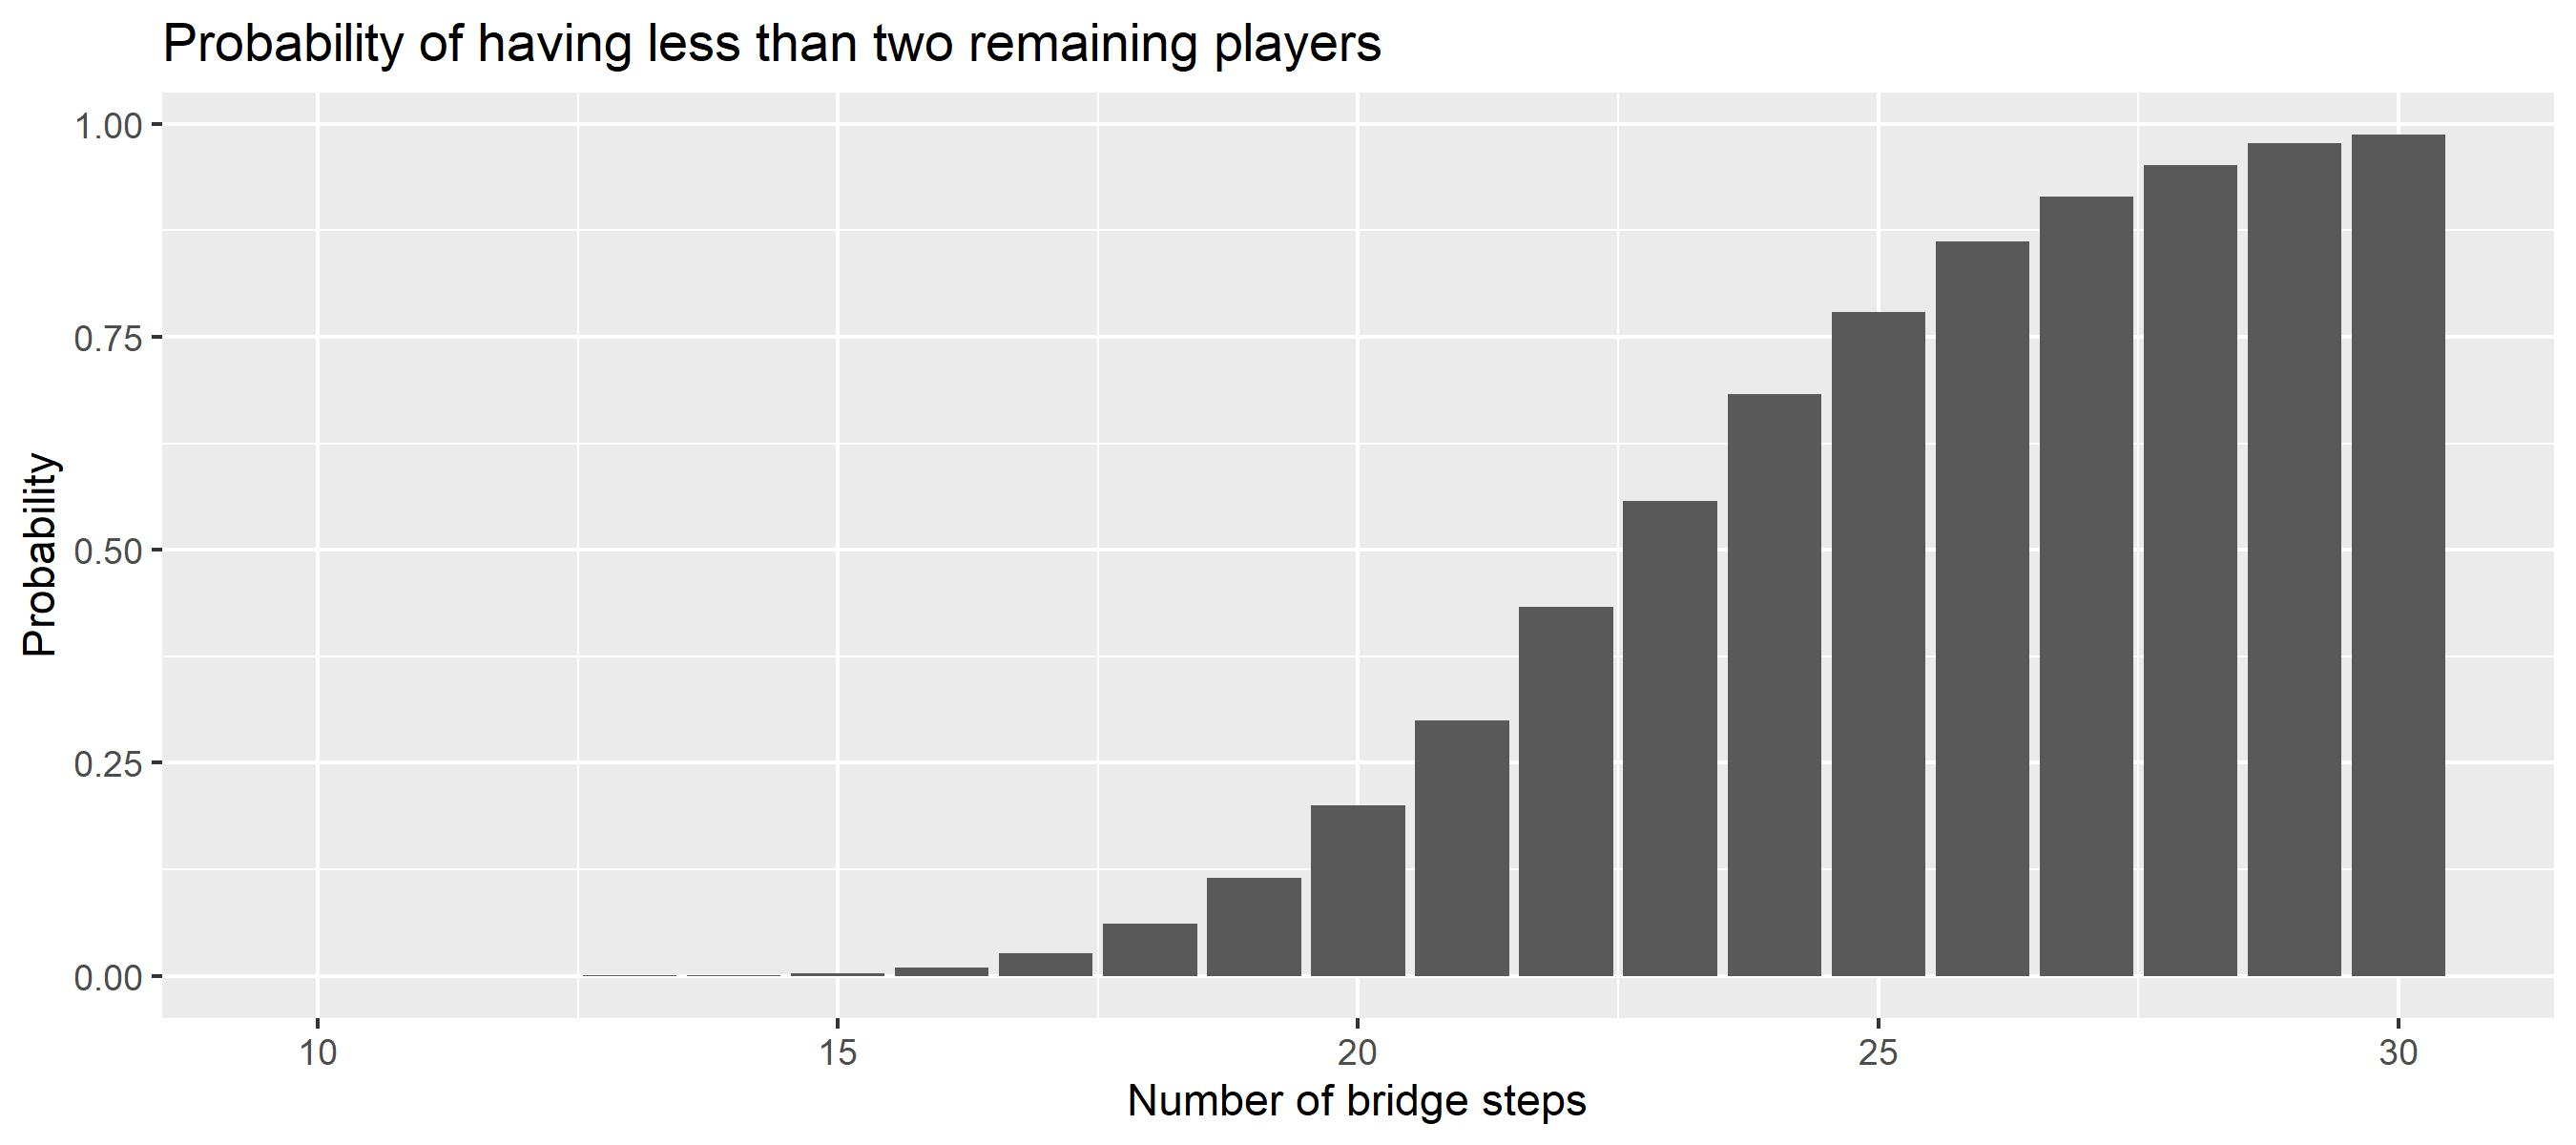

In [18]:
stepSimSummary.plot(x = { it.first }, y = { it.second }).geomCol().labs(
    title = "Probability of having less than two remaining players",
    x = "Number of bridge steps",
    y = "Probability"
).show()


In [ ]:

    stepSimSummary.plot(x = { it.first }, y = { it.second }).geomCol().labs(
        title = "Probability of having less than two remaining players",
        x = "Number of bridge steps",
        y = "Probability"
    ).show()

}

In [10]:

// Compute probability of having less than two survivors for each step siz
    val stepSimSummary = stepSims.groupBy { it.numSteps }.map { (steps, games) ->
        steps to games.count { it.playersLeft < 2 }.toDouble() / games.size
    }

    stepSimSummary.plot(x = { it.first }, y = { it.second }).geomCol().labs(
        title = "Probability of having less than two remaining players",
        x = "Number of bridge steps",
        y = "Probability"
    ).show()

}